In [158]:
# import thư viện
import numpy as np
import cv2      # cv2 install bản 3.x
import matplotlib.pyplot as plt

In [159]:
grayImg = cv2.imread('Lenna.jpg', cv2.IMREAD_GRAYSCALE);

def plotToCompare(orgImg, myImg, libImg, t1 = 'Origin', t2 = 'My Algorithm', t3 = 'OPEN CV' ):
    plt.figure(figsize=(15, 15))
    plt.subplots_adjust(wspace=1)

    plt.subplot(1, 3, 1)
    plt.title(t1)
    plt.imshow(orgImg, cmap='gray')
    # plt.show()

    plt.subplot(1, 3, 2)
    plt.title(t2)
    plt.imshow(myImg, cmap='gray')

    plt.subplot(1, 3, 3)
    plt.title(t3)
    plt.imshow(libImg, cmap='gray')
    plt.show()


# Color Transformation #
- Probability Density Function - based mapping




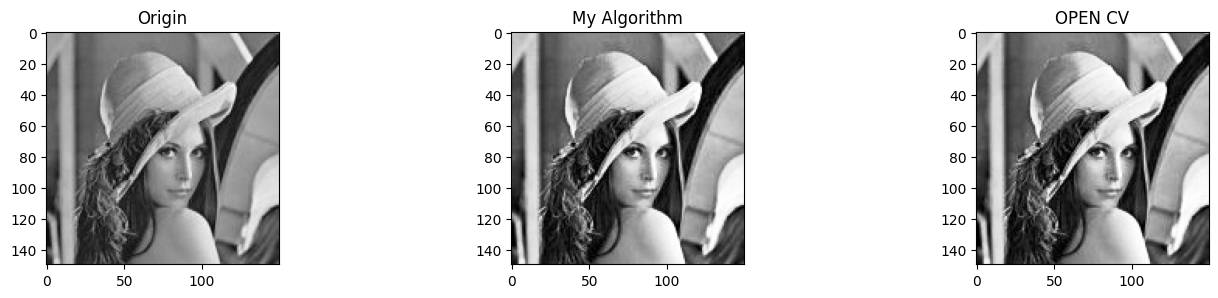

In [160]:
def probalityDensity(img_gray):
    n,m = img_gray.shape
    
    # nG levels (from 0 to max gray level in img)
    nG = np.max(img_gray) + 1;

    # step1: initialize an array with 237 elements from 0->max(maxList) = 0-236
    hArr = np.zeros(nG, dtype=int);

    # step2: count number appears of each level
    for i in img_gray:
        for j in i:
            hArr[j] +=1;

    # step 3
    tArr = [];
    tArr.append(hArr[0]);
    for i in range(1,nG):
        val = tArr[i-1] + hArr[i]
        tArr.append(val);

    # step4: chuan hoa tR
    for i in range(0,nG):
        tArr[i] = round((nG-1)/(n*m) * tArr[i]);

    resArr = img_gray.copy()
    for i in range(n):
        for j in range(m):
            val = resArr[i][j];
            resArr[i][j] = tArr[val]         
    return resArr

dst = cv2.equalizeHist(grayImg)

resArr = probalityDensity(grayImg)
plotToCompare(grayImg, resArr, dst)

- Linear mapping

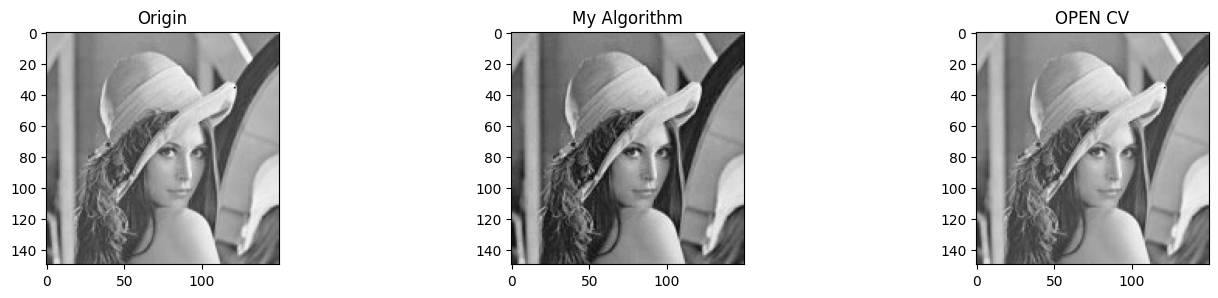

In [200]:
# độ sáng
def brighnessModify(coefficent, srcImg):
    dst = srcImg.copy()
    
    for i in range(dst.shape[0]):
        for j in range(dst.shape[1]):
            dst[i][j] += coefficent;
            
    return np.clip(dst, 0, 255).astype('uint8')
brightImg = brighnessModify(20, grayImg);


def contrastModify(coefficent, srcImg):
    dst = srcImg.copy()
    
    for i in range(dst.shape[0]):
        for j in range(dst.shape[1]):
            dst[i][j] *= coefficent;
            
    return np.clip(dst, 0, 255).astype('uint8')
contrastImg = contrastModify(0.2, grayImg)


def brightAndContrastModify(contCoef, brightCoef, srcImg):
    dst = srcImg.copy()
    
    for i in range(dst.shape[0]):
        for j in range(dst.shape[1]):
            dst[i][j] = dst[i][j]*contCoef + brightCoef;            
    return np.clip(dst, 0, 255).astype('uint8')

brightAndContImg = brightAndContrastModify(1, 20, grayImg)
new_image = cv2.convertScaleAbs(grayImg, alpha=1, beta=20)


# Geometry Transformation #
## Linear interpolation ##
<b> Nhận xét: </b>
1. Scale up
- Ảnh cho ra bị nhạt so với ảnh gốc
- Ảnh dùng bằng OpenCV sẽ cho ra đậm hơn ảnh gốc
2. Scale down
- Ảnh cho ra có tình trạng blocky nhiều hơn so với ảnh thư viện


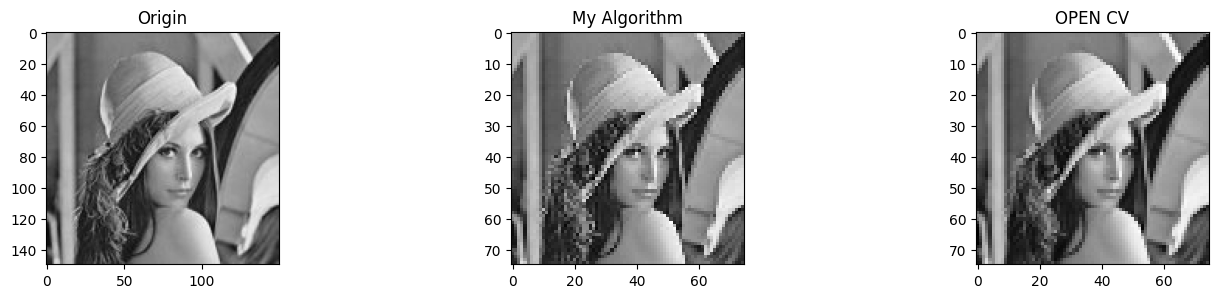

True

In [161]:
n,m = grayImg.shape

# aX, aY decide the proportion for scalign
aX = 0.5;
aY = 0.5;
gSize = [round(aX*n), round(aY*m)];

# phep bien doi T-1
def calcOrgCord(gX, gY, aX, aY):
    return(gX/aX, gY/aY)


def interLinear(fx, fy, grayImg):
    gSize = [round(fx*n), round(fy*m)];
    gArr = np.zeros((gSize[0], gSize[1]), dtype=int);
    
    # scale trong he toa do
    for i in range(n):
        for j in range(m):
            x = round(i*aX);
            y = round(j*aY);
            if(x<gSize[0] and y<gSize[1]):
                gArr[x,y] = grayImg[i][j]
                
    # noi suy gia tri mau
    for gX in range(gArr.shape[0]):
        for gY in range(gArr.shape[1]):
            fX, fY = calcOrgCord(gX, gY, aX, aY)
            l = round(fX)
            k = round(fY)
            if(l >= n-1) : l=n-2
            if(k >= m-1) : k=n-2
            a = fX-l
            b = fY-k
            gArr[gX][gY] = round((1-a)*(1-b)*grayImg[l][k] + (1-b)*(a)*grayImg[l+1][k] + (1-a)*(b)*grayImg[l][k+1] + a*b*grayImg[l+1][k+1])

    return np.clip(gArr, 0, 255).astype('uint8')
    
dst = cv2.resize(grayImg, (gSize[0],gSize[1]), cv2.INTER_LINEAR)
gArr = interLinear(aX, aY, grayImg)
    
plotToCompare(grayImg, gArr, dst)
cv2.imwrite('scaleUp.jpg', gArr)
cv2.imwrite('scaleUpStandart.jpg', dst)


    

# Image Smoothing #
- Gaussian

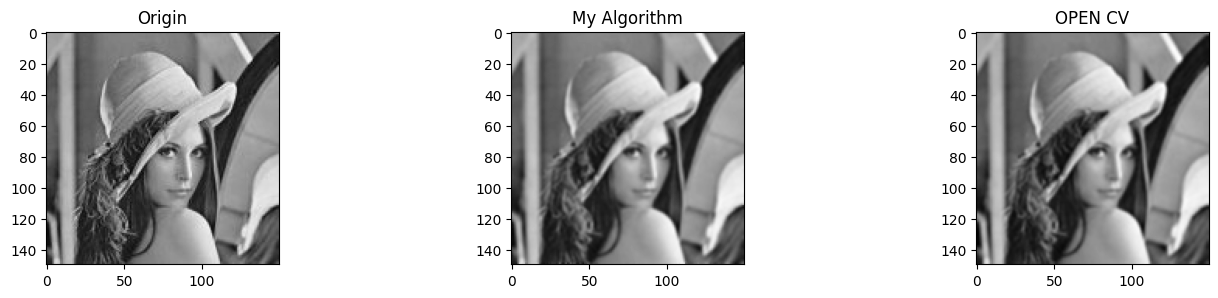

In [162]:
Gblur = cv2.GaussianBlur(grayImg,(3,3),0)

GaussianKernel = np.array([[1,2,1],
                            [2,4,2],
                            [1,2,1]])/16

def gaussFilter(GaussianKernel, img): 
    blurImg = img.copy()

    for i in range (1,img.shape[0]-1):
        for j in range (1,img.shape[1]-1):
            blurImg[i,j] = (img[i-1: i+2, j-1: j+2].astype('float64')*GaussianKernel).sum()

    return np.clip(blurImg, 0, 255).astype('uint8')

gaussImg = gaussFilter(GaussianKernel, grayImg)

plotToCompare(grayImg, gaussImg, Gblur)


- Average

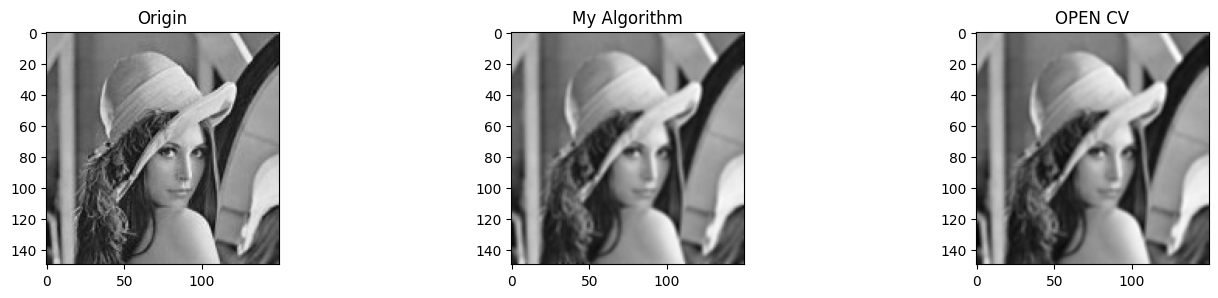

In [163]:
h = np.array([[1, 1, 1],
              [1, 1, 1],
              [1, 1, 1]])/9

avg = cv2.blur(grayImg, (3,3))

def avgFilter(hFilter, img):
    aveImg = img.copy()

    for i in range (1,img.shape[0]-1):
        for j in range (1,img.shape[1]-1):
            aveImg[i,j] = (img[i-1: i+2, j-1: j+2].astype('float64')*hFilter).sum()
    return np.clip(aveImg, 0, 255).astype('uint8')

avgImg = avgFilter(h, grayImg)
plotToCompare(grayImg, avgImg, avg)


- Median

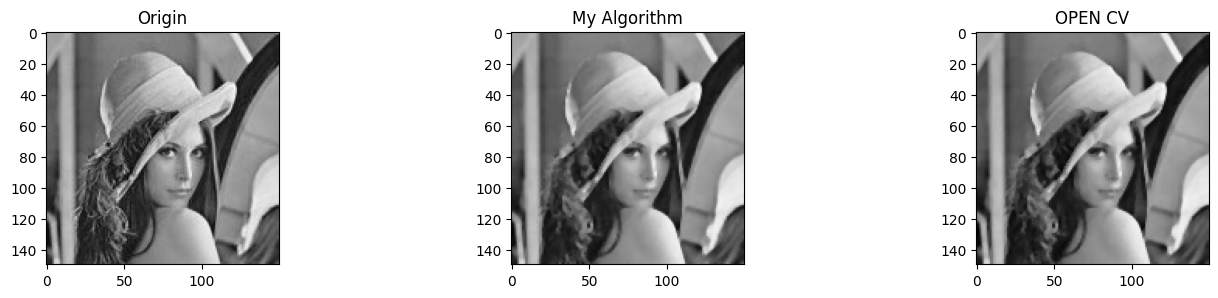

In [164]:
med = cv2.medianBlur(grayImg, 3);

def medFilter(grayImg):
    medArr = np.copy(grayImg);
    for i in range (1,grayImg.shape[0]-1):
        for j in range (1,grayImg.shape[1]-1):
            medElement = np.sort(np.array(grayImg[i-1: i+2, j-1: j+2]), axis=None)[4];
            medArr[i][j] = medElement;
    return medArr

medImg = medFilter(grayImg)

plotToCompare(grayImg, medImg, med)

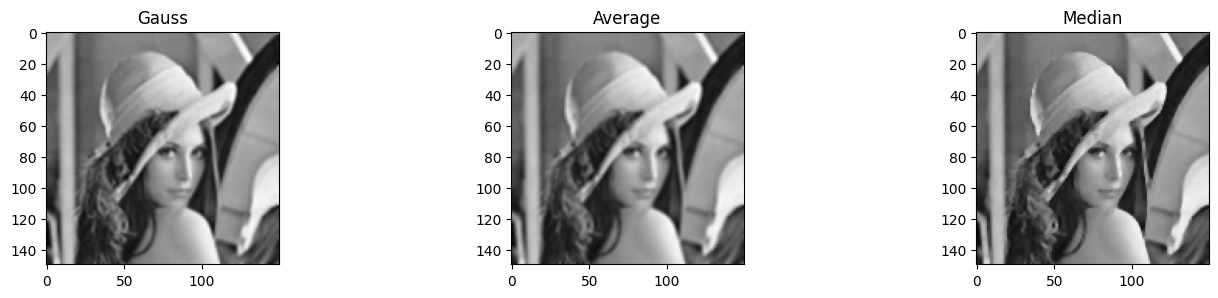

In [165]:
plotToCompare(gaussImg, avgImg, medImg, 'Gauss', 'Average', 'Median')